<a href="https://colab.research.google.com/github/arutraj/.githubcl/blob/main/FacebookProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [4]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphr50w7u9/oxnfcvcv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphr50w7u9/_jl960bz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26407', 'data', 'file=/tmp/tmphr50w7u9/oxnfcvcv.json', 'init=/tmp/tmphr50w7u9/_jl960bz.json', 'output', 'file=/tmp/tmphr50w7u9/prophet_modelpzhupy91/prophet_model-20241123031955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:19:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:19:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [7]:
future = m.make_future_dataframe(periods=10)
future.tail()

,ds
2910,2016-01-26
2911,2016-01-27
2912,2016-01-28
2913,2016-01-29
2914,2016-01-30


In [8]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
2910,2016-01-26,8.789566,8.158057,9.389299
2911,2016-01-27,8.600201,7.971142,9.206646
2912,2016-01-28,8.587050,7.997637,9.211139
2913,2016-01-29,8.577279,7.978444,9.166904
2914,2016-01-30,8.317473,7.697268,8.905784


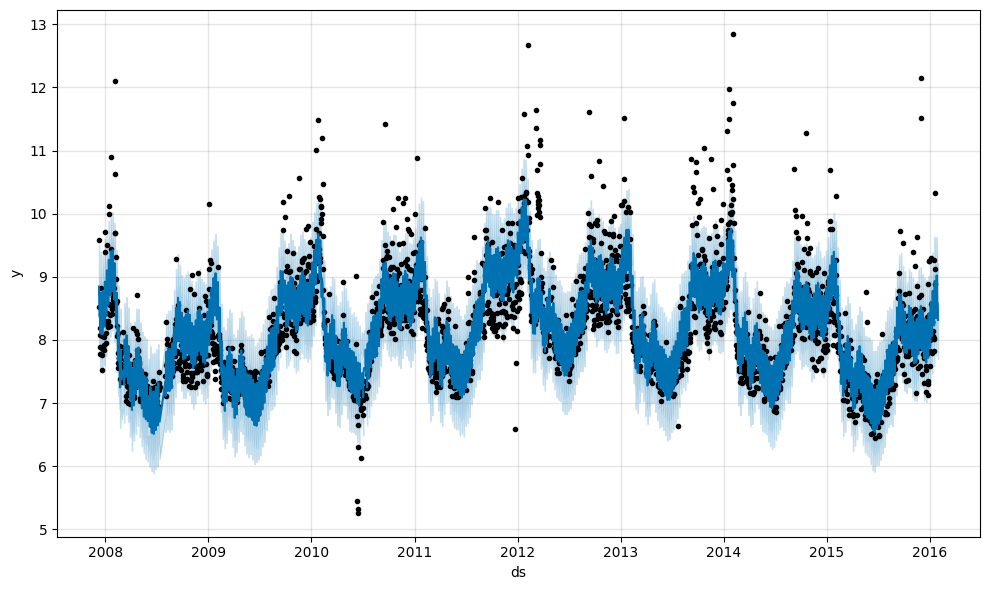

In [9]:
fig1 = m.plot(forecast)


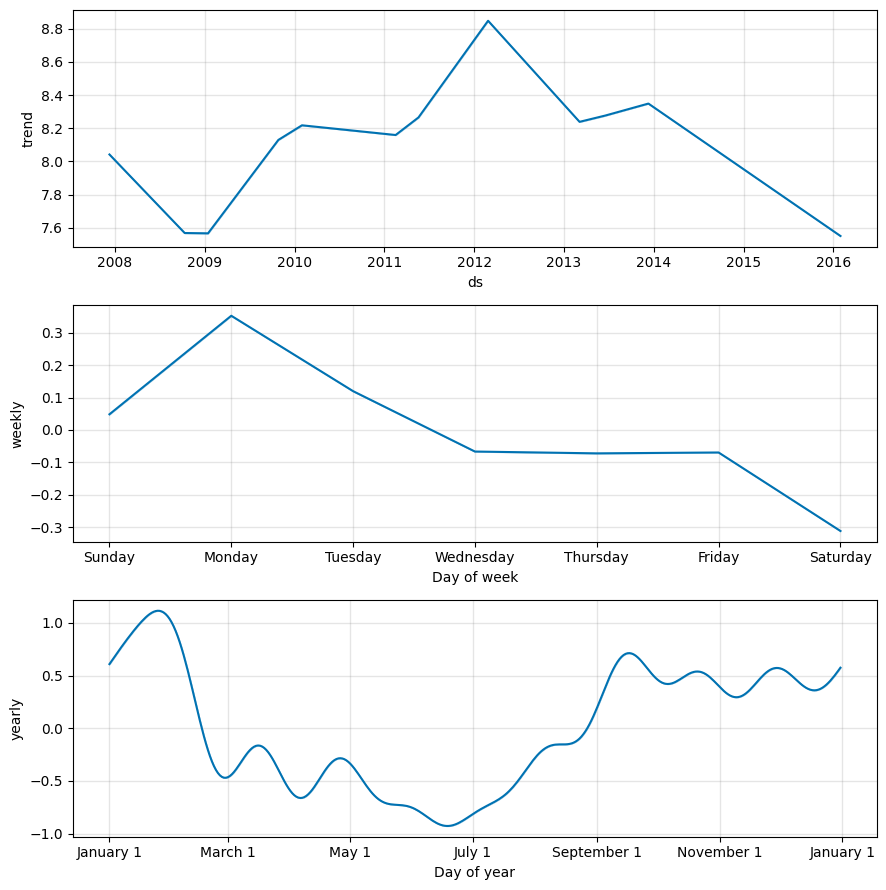

In [10]:
fig2 = m.plot_components(forecast)


In [11]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)


In [12]:
plot_components_plotly(m, forecast)


/usr/local/lib/python3.10/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.

